In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
directory = 'C:\\Users\\Ranjith\\CIT\\Adv ML\\Project\\datasets\\OralCancer'
non_cancer,cancer = [],[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if filename == 'non-cancer':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)
            non_cancer.append(cv2.resize(img,(256,256)))
    if filename == 'cancer':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)           
            cancer.append(cv2.resize(img,(256,256)))

In [3]:
y = np.append(np.zeros(len(non_cancer)),np.ones(len(cancer)))
y = y.reshape(-1,1)

In [4]:
X = non_cancer + cancer

In [5]:
t = X[0]
for i in X[1:]:
    t = np.concatenate((t,i))

In [6]:
t = t.reshape(len(X),256,256)

In [7]:
t.shape , y.shape

((131, 256, 256), (131, 1))

In [8]:
from sklearn import utils
t, y = utils.shuffle(t, y)

In [9]:
from sklearn.model_selection import train_test_split
X = t.reshape(131,-1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Train Score : ',logreg.score(X_train,y_train))
print('Test  Score : ',logreg.score(X_test,y_test))

Train Score :  0.9903846153846154
Test  Score :  0.7037037037037037


In [11]:
from sklearn.svm import SVC
logreg = LogisticRegression()
from sklearn.model_selection import GridSearchCV
params = {'penalty' : ['l1', 'l2'],
          'solver'  : ['liblinear','saga'],
          'max_iter': [100,500,1000]}
grid = GridSearchCV(logreg,params,cv=2)
grid.fit(X_train,y_train)
print('Best Params : ',grid.best_params_)
print('Train Score : ',grid.score(X_train,y_train))
print('Test  Score : ',grid.score(X_test,y_test))

Best Params :  {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Train Score :  0.9807692307692307
Test  Score :  0.7777777777777778


# Support Vector Machines

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train,y_train.reshape(-1,))
print('Train Score : ',svm.score(X_train,y_train))
print('Test  Score : ',svm.score(X_test,y_test))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

train_score,test_score = [],[]
from sklearn.model_selection import cross_validate
for i in range(5,25,5):
    svm = SVC(kernel='poly',degree=i)
    res = cross_validate(svm,X_train,y_train,scoring = 'accuracy',return_train_score=True,cv=2)
    train_score.append(np.mean(res['train_score']))
    test_score.append(np.mean(res['test_score']))

Train Score :  0.9903846153846154
Test  Score :  0.7037037037037037


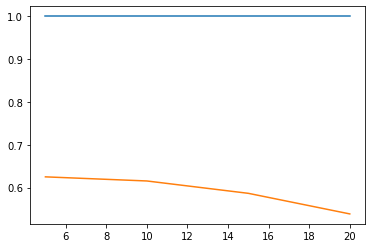

In [ ]:
x = [i for i in range(5,25,5)]
from matplotlib import pyplot as plt
plt.plot(x,train_score,label="Train")
plt.plot(x,test_score,label="Test")

In [ ]:
from sklearn.svm import SVC
svm = SVC()
from sklearn.model_selection import GridSearchCV
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'max_iter' : [i for i in range(100,1000,100)],
          'decision_function_shape' : ['ovr','ovo']}
grid = GridSearchCV(svm,params,cv=2)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900]})

In [ ]:
grid.best_params_

{'decision_function_shape': 'ovr', 'kernel': 'rbf', 'max_iter': 100}

In [ ]:
svm = SVC(decision_function_shape = 'ovo' , kernel = 'poly' , degree=10 , max_iter = 100)
svm.fit(X_train,y_train)
print('Train Score : ',svm.score(X_train,y_train))
print('Test  Score : ',svm.score(X_test,y_test))

Train Score :  0.7884615384615384
Test  Score :  0.5925925925925926
